In [13]:
import rosbag_parser as rp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
rosbag_path = "rosbag2_2024_10_22-13_25_55"
scan_topic = "/scan"
ackermann_cmd_topic = "/drive"
odom_topic = "/ego_racecar/odom"

print(rp.get_rosbag_topics(rosbag_path))

bag = {"scan": rp.read_rosbag_scan(rosbag_path, scan_topic),
       "odom": rp.read_rosbag_odom(rosbag_path, odom_topic)}

['/map_updates', '/goal_pose', '/rosout', '/parameter_events', '/cmd_vel', '/drive', '/tf', '/ego_racecar/odom', '/tf_static', '/ego_robot_description', '/joint_states', '/clock', '/initialpose', '/map', '/scan']


## Clean data

In [15]:
x = []
y = []
for i, val in enumerate(bag["odom"]):
    if np.isnan(val.pose.pose.position.x ) or np.isnan(val.pose.pose.position.y):
        continue
    x.append(val.pose.pose.position.x)
    y.append(val.pose.pose.position.y)
pandas_data = pd.DataFrame(data={"x": x, "y": y})

(2000, 2000)


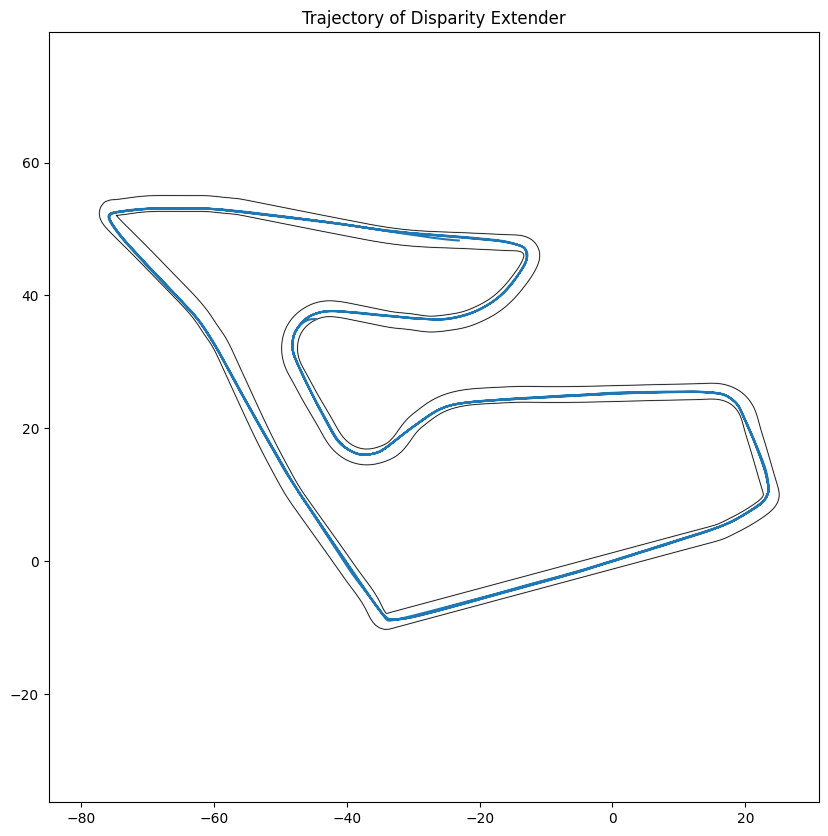

In [41]:
im = plt.imread("../f1tenth_ws/src/maps/maps/Spielberg_map.png")
print(im.shape)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(pandas_data["x"], pandas_data["y"])
ax.set_aspect('equal')
ax.set_title("Trajectory of Disparity Extender")
origin = [-84.85359914210505, -36.30299725862132]
resolution = 0.05796
ax.imshow(im, cmap='Greys_r', extent=[origin[0], origin[0]+im.shape[0]*resolution, origin[1], origin[1]+im.shape[1]*resolution])

plt.show()